In [1]:
import numpy as np
from gradvi.tests import toy_data, toy_priors
from gradvi.normal_means import NormalMeans

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 72)

In [2]:
n = 100
scale = 1.44
np.random.seed(100)
dj = np.square(np.random.normal(1, 0.5, size = n)) * n
prior = toy_priors.get_ash_scaled()
y, sj2 = toy_data.get_normal_means(prior, n = n, s2 = scale, dj = dj, seed = 100)
nm = NormalMeans(y, prior, sj2, scale = scale, d = dj)

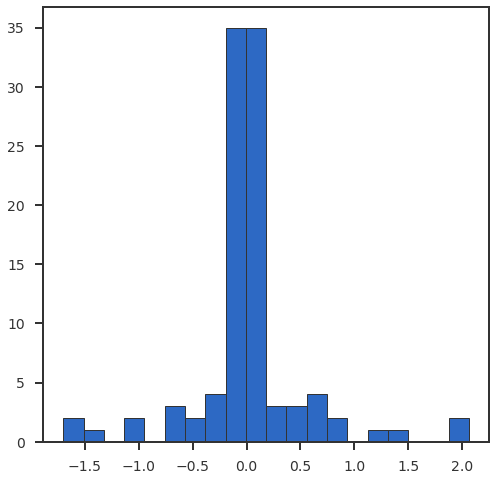

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(y)
plt.show()

### Third order derivative of log likelihood

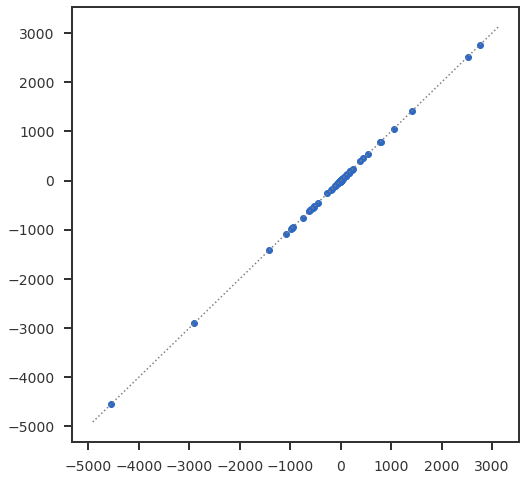

In [4]:
eps = 1e-8
nm_eps = NormalMeans(y + eps, prior, sj2, scale = scale, d = dj)
d1 = nm.logML_deriv3
d2 = (nm_eps.logML_deriv2- nm.logML_deriv2) / eps 
np.testing.assert_allclose(d1, d2, atol = 1e-3, rtol = 1e-8)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(d1, d2)
mpl_utils.plot_diag(ax1)
plt.show()

### Second order derivative of Penalty Operator

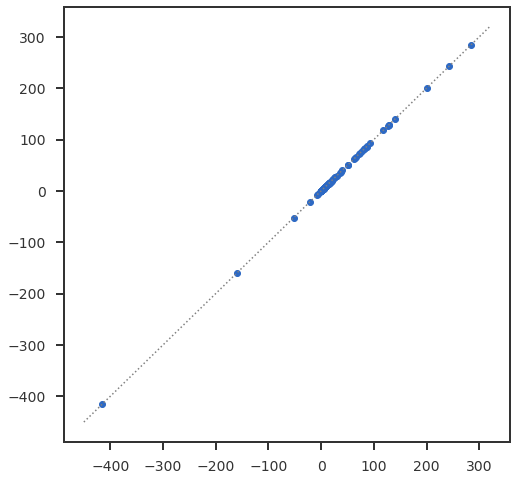

In [5]:
eps = 1e-8
nm_eps = NormalMeans(y + eps, prior, sj2, scale = scale, d = dj)

d1 = nm.penalty_operator(hess = True)[4]
d2 = (nm_eps.penalty_operator()[1] - nm.penalty_operator()[1]) / eps

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(d1, d2)
mpl_utils.plot_diag(ax1)
plt.show()

### Second order derivative of Shrinkage Operator

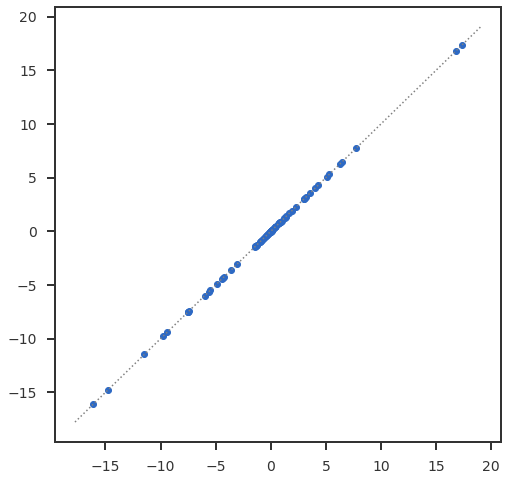

In [9]:
eps = 1e-8
nm_eps = NormalMeans(y + eps, prior, sj2, scale = scale, d = dj)

d1 = nm.shrinkage_operator(hess = True)[4]
d2 = (nm_eps.shrinkage_operator()[1] - nm.shrinkage_operator()[1]) / eps

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(d1, d2)
mpl_utils.plot_diag(ax1)
plt.show()